# Week 2 Figures

import the datasets

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
years_use = ['1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

In [2]:
# claims dataset
os.chdir('/Users/calvinwhealton/Documents/GitHub/tdi_capstone')
claims = pd.read_csv('ts_claims.csv')

In [6]:
# number of zips with a claim in a given year
claims_per_yr = claims.shape[0] - (claims == 0).astype(int).sum(axis=0)[years_use]

In [7]:
claims_per_yr

1996    5533
1997    3936
1998    4912
1999    3357
2000    2221
2001    3251
2002    2717
2003    3849
2004    4841
2005    4177
2006    3447
2007    3416
2008    4543
2009    3769
2010    4365
2011    5707
2012    3191
2013    3680
2014    3136
2015    3892
2016    3213
2017    4008
2018    4066
2019    2841
dtype: int64

In [8]:
# zillow data
os.chdir('/Users/calvinwhealton/Documents/GitHub/tdi_capstone/housing_data')
housing = pd.read_csv('zillow_ann_pct_val.csv')

In [62]:
claims.head()


,Unnamed: 0,zips,1970,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,512.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
1,1,593.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
2,2,601.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
3,3,602.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,163468.72,0.0,0.0
4,4,603.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,7512.24,0.0,0.0,0.0,89270.14,0.0,0.0


In [66]:
claims['GEOID10'] = claims['zips'].apply(lambda x: '{0:0>5}'.format(x))

In [14]:
housing_per_year = housing.shape[0] - housing.isnull().astype(int).sum(axis=0)[years_use]

In [15]:
housing_per_year

1996    13275
1997    13960
1998    14438
1999    15440
2000    16291
2001    16802
2002    17333
2003    17739
2004    18194
2005    19244
2006    22847
2007    23494
2008    25407
2009    26067
2010    26592
2011    27070
2012    27511
2013    27963
2014    28509
2015    29239
2016    29643
2017    30025
2018    30368
2019    30478
dtype: int64

In [16]:
# peak gage data
os.chdir('/Users/calvinwhealton/Documents/GitHub/tdi_capstone')
ts_rps = pd.read_csv('ts_rps.csv')

In [17]:
rps_per_year = ts_rps.shape[0] - (ts_rps == 0).astype(int).sum(axis=0)[years_use]

In [19]:
rps_per_year

1996    6816
1997    5965
1998    7247
1999    7029
2000    7161
2001    6934
2002    7089
2003    7189
2004    7079
2005    6746
2006    6614
2007    6412
2008    7260
2009    6631
2010    6378
2011    6964
2012    6079
2013    6636
2014    6601
2015    6852
2016    5531
2017    6686
2018    5885
2019    4668
dtype: int64

RuntimeError: In set_size: Could not set the fontsize

<Figure size 432x288 with 0 Axes>

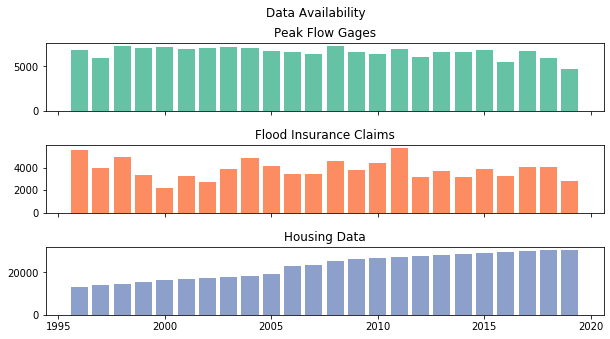

In [52]:

import matplotlib.gridspec as gridspec
df = pd.DataFrame({'gages' : rps_per_year, 'claims' : claims_per_yr, 'housing': housing_per_year})
fig2 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, figure=fig2)



fig, axs = plt.subplots(3,figsize=(10,5),sharex=True)
fig.subplots_adjust(hspace=.5)
fig.suptitle('Data Availability')
axs[0].bar(height=df.gages,x=range(1996,2020),color='#66c2a5',)
axs[1].bar(height=df.claims,x=range(1996,2020),color='#fc8d62')
axs[2].bar(height=df.housing,x=range(1996,2020),color='#8da0cb')

ind = 0
for ax in axs:
    ax.set_title(['Peak Flow Gages','Flood Insurance Claims','Housing Data'][ind])
    ind += 1
fig.savefig('fig_data_time.png', dpi=1)

plt.show()


In [ ]:
# making map

In [53]:
import os
import pandas as pd
import geopandas as gpd
import folium
import branca
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [61]:
communities_geo = gpd.read_file('tl_2019_us_zcta510.shp') # geojson file



In [63]:
communities_geo.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,"POLYGON ((-83.70873 41.32733, -83.70815 41.327..."
1,43452,43452,B5,G6350,S,121522304,13721730,+41.5157923,-082.9809454,"POLYGON ((-83.08698 41.53780, -83.08256 41.537..."
2,43456,43456,B5,G6350,S,9320975,1003775,+41.6318300,-082.8393923,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ..."
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,"POLYGON ((-83.49650 41.25371, -83.48382 41.253..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.22229 41.53102, -83.22228 41.532..."


In [65]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/tdi_capstone/geo_data/tl_2019_us_zcta510')

# file name - file is located in the working directory
communities_geo = gpd.read_file('tl_2019_us_zcta510.shp') # geojson file



type(communities_geo['GEOID10'][0])

str

In [76]:
# create a plain world map
communities_map = folium.Map(location=[39.8283,-98.5795], zoom_start=4)

# generate choropleth map 
communities_map.choropleth(
    geo_data=communities_geo,
    data=claims,
    columns=['GEOID10','2018'],
    key_on='features.GEOID10',
    #fill_color='YlGnBu', 
    fill_opacity=1, 
    line_opacity=1,
    legend_name='Flood Insurance Claims',
    smooth_factor=0)

communities_map

/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


AttributeError: 'NoneType' object has no attribute 'get'

In [ ]:

# display map
communities_map